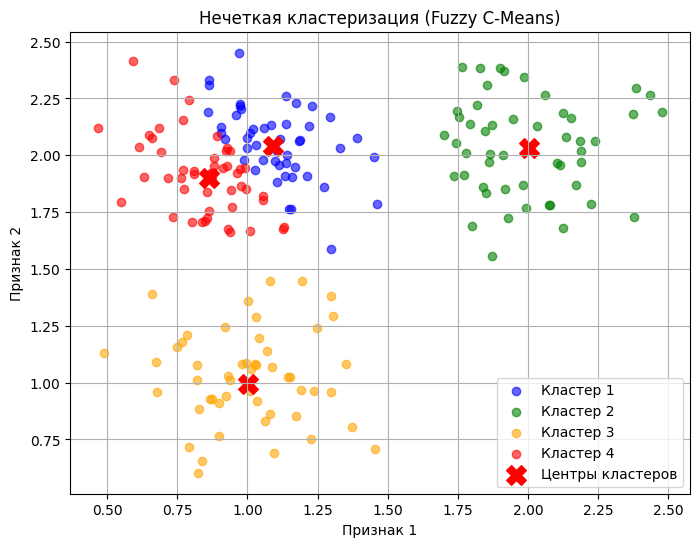

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Генерируем двумерные тестовые данные
np.random.seed(0)
data = np.vstack([
    np.random.normal(loc=[1, 1], scale=0.2, size=(50, 2)),
    np.random.normal(loc=[2, 2], scale=0.2, size=(50, 2)),
    np.random.normal(loc=[1, 2], scale=0.2, size=(50, 2)),
    np.random.normal(loc=[1, 2], scale=0.2, size=(50, 2)),
]).T  # shape: (2, 150) для skfuzzy

# Количество кластеров
n_clusters = 4
# Фактор нечеткости
m = 2
# Критерий сходимости
error = 1e-5
# Максимальное число итераций
maxiter = 2000

# FCM кластеризация через skfuzzy
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None, seed=42
)

# Получаем 'жесткую' принадлежность: к какому кластеру ближе всего каждая точка
labels = np.argmax(u, axis=0)

# Визуализация результатов
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'orange', "red"]
for i in range(n_clusters):
    ax.scatter(data[0, labels == i], data[1, labels == i],
               c=colors[i], label=f'Кластер {i+1}', alpha=0.6)
ax.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X',
           s=200, label='Центры кластеров')
ax.set_title('Нечеткая кластеризация (Fuzzy C-Means)')
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.legend()
plt.grid(True)
plt.show()
